In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv('C:\Computer Science\Machine Learning\Projects\Gold Price Prediction\gld_price_data.csv')
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [4]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
# Correlation
# 1. Positive coorelation
# 2. Negative coorelation

In [9]:
correlation = df.corr()
correlation

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13968\3035769115.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot: >

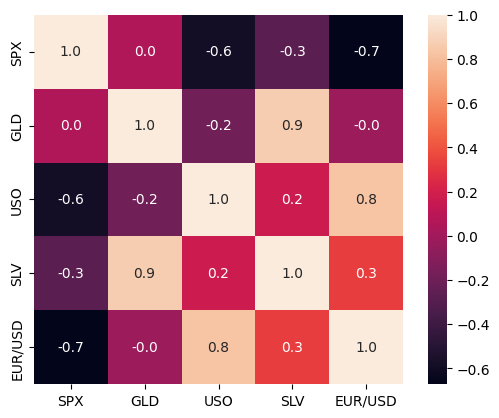

In [11]:
sns.heatmap(correlation,cbar = True,square = True,fmt = '.1f',annot = True)

In [12]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13968\2043786786.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color = 'gold')


<AxesSubplot: xlabel='GLD', ylabel='Density'>

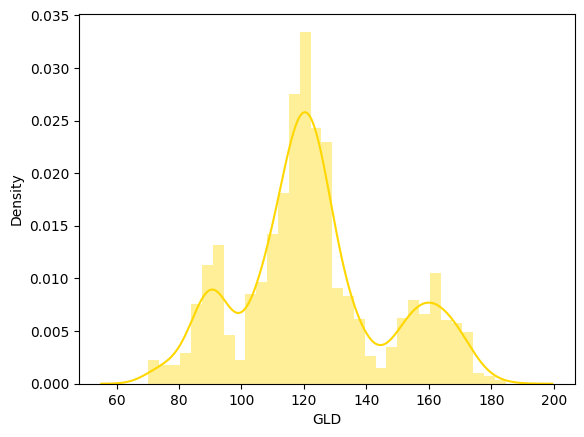

In [14]:
sns.distplot(df['GLD'],color = 'gold')

In [17]:
x = df.drop(columns = ['Date','GLD'],axis = 1)
y = df['GLD']

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
x_train

,SPX,USO,SLV,EUR/USD
476,1138.500000,39.790001,16.889999,1.361693
1958,2202.939941,10.630000,15.800000,1.063886
248,700.820007,24.480000,12.770000,1.256408
2231,2656.000000,11.890000,15.570000,1.225280
1325,1838.880005,33.040001,19.420000,1.366998
...,...,...,...,...
1071,1409.150024,32.320000,32.980000,1.287515
433,1132.989990,40.270000,17.230000,1.442398
674,1286.119995,38.610001,27.389999,1.357276
1099,1461.890015,33.919998,29.180000,1.306745


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [21]:
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

RandomForestRegressor()

In [24]:
y_pred = model.predict(x_test)
y_pred

array([167.87389861,  82.12849929, 117.76580068, 127.61590087,
       120.8958991 , 152.72950081, 150.40450005, 126.90170048,
       117.6204984 , 126.67909811, 117.34070113, 171.51030117,
       142.2526991 , 168.13959811, 116.05900133, 118.59770116,
       139.40640075, 169.50380115, 160.14840572, 172.96159835,
       154.78840181, 125.66160008, 174.87839885, 157.96490342,
       125.92200037,  94.03010045,  79.64199937, 120.45840027,
       119.2438994 , 167.15999948,  89.26539993, 127.02170116,
        93.06029989, 118.64530121, 121.42790141, 136.47219942,
       117.43580035, 116.4430009 , 153.30530029, 109.52210002,
       101.46180122,  88.19849852, 126.91950031, 117.50290033,
       147.87149773, 120.3440001 , 108.4229997 , 109.19409905,
        93.69430143, 127.7389966 ,  75.74890015, 114.45719964,
       121.87379984, 110.74049972, 120.88670068, 119.98379941,
       153.39920062, 168.6571017 , 146.84159741,  86.99799971,
        94.80379963,  86.94609814,  91.70319969, 119.70

In [25]:
# R squared error
error = metrics.r2_score(y_test,y_pred)
error

0.9841100527296901

In [27]:
y_test = list(y_test)

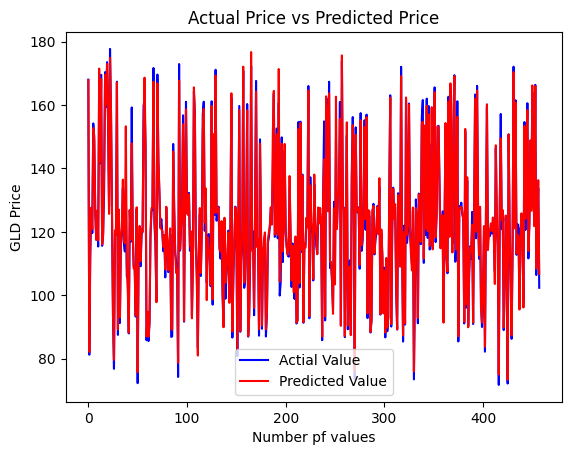

In [28]:
plt.plot(y_test,color = "blue",label =  "Actial Value")
plt.plot(y_pred,color = "red",label = "Predicted Value")
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number pf values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()